# (Dataset Exploration (Titanic Data))

## Preliminary Wrangling

> Data about passengers survive on titanic
 


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from plots import draw_hist

%matplotlib inline

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape


(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df['Age'].fillna(value=df['Age'].median(), inplace=True) 


### What is the structure of your dataset?

> ## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



## Univariate Exploration


Text(0.5, 1.0, 'Ages of Passengers')

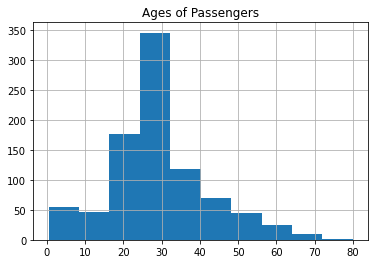

In [9]:
df['Age'].hist()
plt.title('Ages of Passengers') 

> most  passengers ages are between 20 to 40 and max of age is 80


In [10]:
#extract new features from 2 columns SibSp,Parch
df['Family_Size']=df['SibSp']+df['Parch']


<AxesSubplot:>

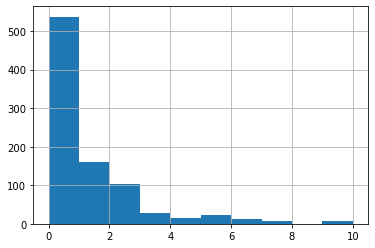

In [11]:
df['Family_Size'].hist()
plt.title("family size")

> we found most of passengers family_size=0 that mean passenger travel alone family size are between 0 t0 10

In [12]:
df.Pclass=df.Pclass.astype(str)

In [13]:
df.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: object

In [14]:
df["Pclass"].replace({"1": "Upper", "2": "Middle","3":"Lower"}, inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

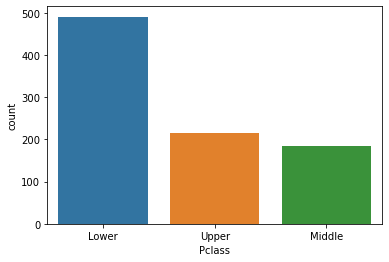

In [15]:
sb.countplot(x=df["Pclass"],data=df)

> The lower p class we found a lot of passengers compared to  other classes

In [16]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
df['Survived'].value_counts().index

Int64Index([0, 1], dtype='int64')

Text(0, 0.5, 'count of Survived ')

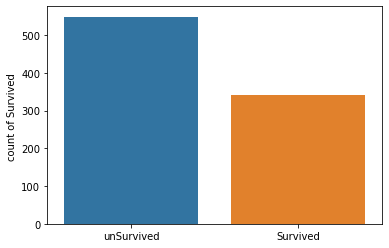

In [18]:
sb.barplot(x=df['Survived'].value_counts().index, y=df['Survived'].value_counts())
plt.xticks(df['Survived'].value_counts().index,['unSurvived', 'Survived'])
plt.ylabel('count of Survived ')

> we found no of unservive greater than Survived

## Bivariate Exploration


what is relationship between age and Survived ,and is the smallest age affects who the survive?

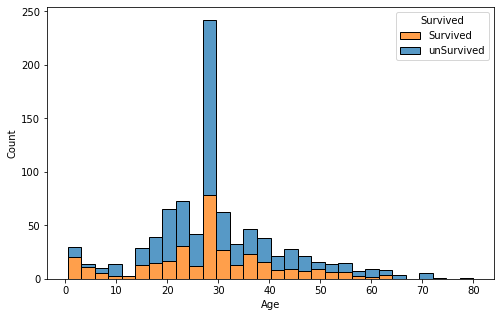

In [19]:
plt.figure(figsize=[8, 5])
draw_hist(df,'Age','Survived',['Survived', 'unSurvived'],'Survived','stack')



the most passengers survive who the age in middle at age 30 and the age greater than 60 most of passengers don't survive.

what is the relationship between Fare_Per_Person and Embraked  ,Does where you embark change how much you paid?

In [20]:
#find new_featue
df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)


In [21]:
df['Fare_Per_Person'].max()

512.3292

In [22]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

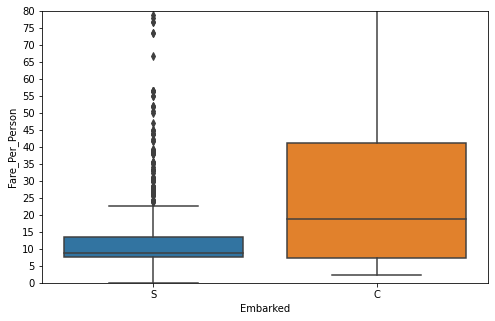

In [23]:
plt.figure(figsize=[8, 5])
sb.boxplot(x='Embarked',y='Fare_Per_Person',data=df.query('Embarked=="C" |Embarked=="S"'))
plt.yticks(np.arange(0,df['Fare_Per_Person'].max()+5,5))
plt.ylim([0,80])
plt.show()

Embarked C has greater  price than Embarked s 

Does Embarked effects on Survived  ?

In [24]:
df[df.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Fare_Per_Person
61,62,1,Upper,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,80.0
829,830,1,Upper,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,80.0


In [25]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

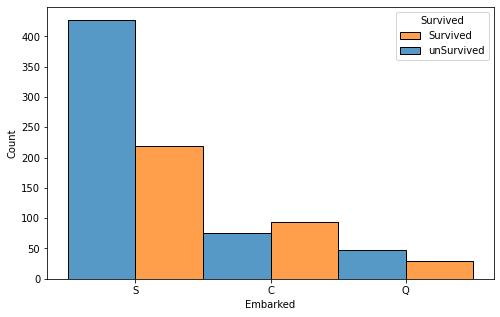

In [26]:
plt.figure(figsize=[8, 5])
draw_hist(df,'Embarked','Survived',['Survived', 'unSurvived'],'Survived','dodge')


Emarked C Survived greater than unServived

## Multivariate Exploration


who male and female passengers Survived?

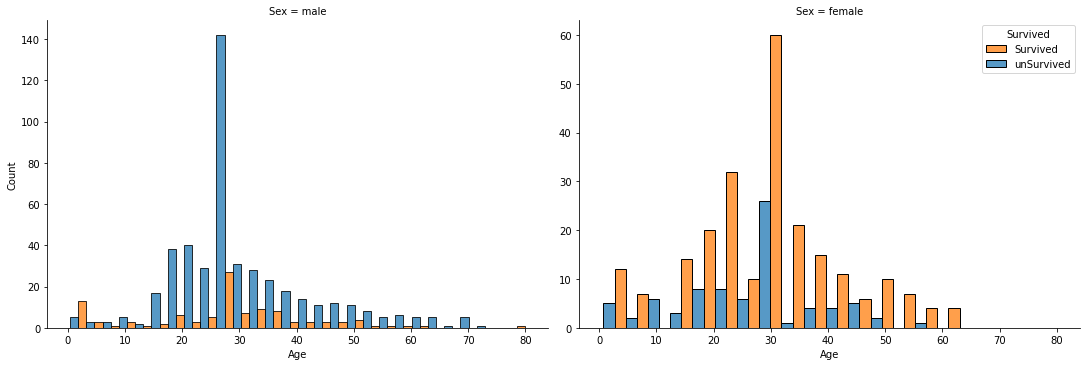

In [27]:

# Form a facetgrid using columns Sex
g = sb.FacetGrid(data = df, col = 'Sex', height = 5, aspect = 1.5,sharey=False)
# map  Hist form facetgrid with some attributes x and hue
g.map_dataframe(sb.histplot,x= 'Age', hue='Survived',multiple='dodge')
# some titles on the Graph 
plt.legend(title='Survived', labels=['Survived', 'unSurvived'])
g.set_xlabels('Age')
g.set_ylabels('Count')
# show the object
plt.show()

female passengers more Survival than male in titatic

Do the family size and class effect on Survival ?

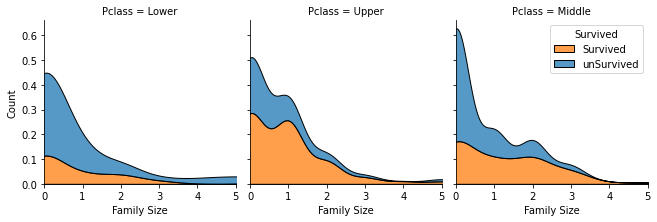

In [28]:
# Form a facetgrid using columns Pclass
g = sb.FacetGrid(df, col='Pclass')
# map  kdeplot form facetgrid with some attributes x and hue
g.map_dataframe(sb.kdeplot, x='Family_Size', hue='Survived',multiple="stack")
# some titles on the Graph 
plt.legend(title='Survived', labels=['Survived', 'unSurvived'])
# adjust locations bins on x axis
plt.xticks(np.arange(df['Family_Size'].min(),df['Family_Size'].max()+1,1))
plt.xlim(0,5)
g.set_xlabels('Family Size')
g.set_ylabels('Count')
# show the object
plt.show()


we found when family size increase, number of survival decrease than unsurvived.  and at middle class the unsurvival decreses than upper and lower.

Do the Embarked and Class affect male and Female Survival?

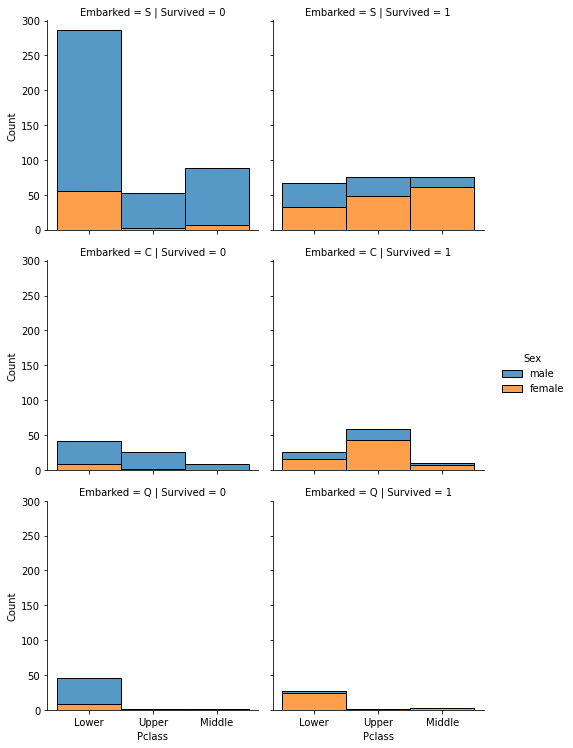

In [29]:

fg1 = sb.displot(df, x="Pclass",hue="Sex",
                  col="Survived",row='Embarked',
                  height=3.5, multiple="stack")

there are most of males Survival at Embarked S and Middle Class and there are more of unsurviving males at Embarked S in lower Class 